###Basic Functionality

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from os import listdir
from os.path import isfile, join
import matplotlib.cm as cm
%matplotlib inline  

In [2]:
netMHCPan = {
        'A0101':0.83585,'A0201':0.96101,'A0202':0.90824,'A0203':0.93336,
        'A0205':0.981,'A0206':0.88616,'A0207':0.886,'A0211':0.97199,
        'A0212':0.96742,'A0216':0.97475,'A0219':0.97382,'A0301':0.92361,
        'A1101':0.94242,'A2301':0.89543,'A2402':0.91937,'A2403':0.95135,
        'A2501':0.77582,'A2601':0.954,'A2602':0.99304,'A2603':0.98277,
        'A2902':0.81755,'A3001':0.80343,'A3002':0.59806,'A3101':0.91681,
        'A3201':0.65394,'A3301':0.90386,'A6801':0.80373,'A6802':0.89398,
        'A6901':0.95306,'A8001':0.89048,'B0702':0.86227,'B0801':0.89156,
        'B0802':0.981,'B0803':0.931,'B1501':0.88653,'B1502':0.79317,
        'B1503':0.85089,'B1509':0.845,'B1517':0.95184,'B1801':0.86837,
        'B2705':0.63188,'B3501':0.90946,'B3801':0.975, 'B3901':0.85931,
        'B4001':0.9418,'B4002':0.83333,'B4402':0.93863,'B4403':0.86596,
        'B4501':0.718,'B4601':0.89244,'B4801':0.95458,'B5101':0.84875,
        'B5301':0.88792,'B5401':0.82651,'B5701':0.95508,'B5801':0.95977,
        'B5801':0.651, 'B7301':0.887
        }

In [3]:
def fileopen(filenames,nb_lines):
    batch = {}
    train = {}
    test = {}
    for files in filenames:
        allele = files.split('/')[1]
        with open(files,'r') as f:
            try:
                batch[allele] = np.arange(0,nb_lines)
                lines = [line.strip() for line in f ]
                test[allele] = [float(num) for num in  lines[0].replace('[','').replace(']','').split(',') ] 
                train[allele] = [float(num) for num in  lines[1].replace('[','').replace(']','').split(',') ]
            except:
                pass
    return batch, train, test

In [4]:

def alleles_plot(mypath, nb_lines, 
                 train_show = True,
                 alleles=all,
                 y_lower = 0.4):
   

    if (alleles==all):
        allele_list = [f for f in listdir(mypath) if isfile(join(mypath,f)) ]
    else:
        allele_list = alleles
    
    onlyfiles = [mypath+f for f in allele_list]
    extensions = ('.png', '.jpg')
    for currentFile in onlyfiles:
        if any(currentFile.endswith(ext) for ext in extensions):
            os.remove(currentFile)
            onlyfiles.remove(currentFile)
    [batch, train, test] = fileopen(onlyfiles,nb_lines)
    
    line_width = 1.0
    plt.figure(figsize=(15, 7), dpi=300)
    plt.ylim(y_lower,1)
    plt.xlim(-0.5, 30)
    plt.xticks(np.arange(0,nb_lines, 1))
    plt.yticks(np.arange(y_lower, 1, 0.025))
    plt.ylabel('AUC')
    plt.xlabel('epoch')
    
    colormap = plt.cm.gist_ncar
    colors = [colormap(i) for i in np.linspace(0, 0.9, len(batch))]
    
    for i, allele in enumerate(allele_list):
        label = allele
        if train_show:
            plt.plot(batch[allele], train[allele], color=colors[i], linewidth=line_width)
            plt.plot(batch[allele], train[allele],'k.')
        plt.plot(batch[allele], test[allele], color = colors[i],linewidth=line_width,label = label)
        plt.plot(batch[allele], test[allele],'k.')
    plt.legend(bbox_to_anchor=(1.13, 1),fancybox=True,frameon=True)
    
    
    title = mypath.split('/')[0]
    plt.title(title,fontsize=20)
    #title = "activation_lr_iterations/" + title + '.png'
    #plt.savefig(title)
    plt.show()

In [5]:
def epoch_sum(alleles,mypath, epochs):
    if (alleles == all):
        allele_list = [f for f in listdir(mypath) if isfile(join(mypath,f)) ]
    else:
        allele_list = alleles
    allele_list = set(allele_list).intersection(netMHCPan.keys())
    onlyfiles = [mypath+f for f in allele_list]
    data = fileopen(onlyfiles, nb_lines)
    print sorted(allele_list)
    epoch_sum = np.zeros(epochs)
    batch = np.arange(0,nb_lines)
    for allele in allele_list:
        for i in range(0,epochs):
            try:
                epoch_sum[i] += data[2][allele][i]
            except:
                pass
    epoch_sum = epoch_sum*1.0/len(allele_list)
    plt.figure(figsize=(15, 4), dpi=300)
    plt.title('Average AUC vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Average AUC')
    plt.xticks(np.arange(0,nb_lines, 1))
    plt.yticks(np.arange(0.6, 1, 0.01))
    plt.plot(batch,epoch_sum)
    plt.plot(batch,epoch_sum,'k.')
    plt.show()

In [31]:
def compare_netMHCpan(alleles,mypath, epoch):
    if (alleles == all):
        allele_list = [f for f in listdir(mypath) if isfile(join(mypath,f)) ]
    else:
        allele_list = alleles
    onlyfiles = [mypath+f for f in allele_list]  
    data = fileopen(onlyfiles,nb_lines)
    sumA = 0
    sumA_nmp = 0
    sumB = 0
    sumB_nmp = 0
    numA =0
    numB= 0
    #print sorted(set(allele_list).intersection(netMHCPan.keys()))
    for allele in sorted(set(allele_list).intersection(netMHCPan.keys())):
        try:
            
            if(allele[0] == 'A'):
                
                sumA +=data[2][allele][epoch]
                sumA_nmp += netMHCPan[allele]
                numA +=1
            else:
                sumB +=data[2][allele][epoch]
                sumB_nmp += netMHCPan[allele]
                numB+=1
            #print allele, '\tCurrent Pred: ', '%.3f' % data[2][allele][epoch], '\tnetMHCpan', '%.3f' % netMHCPan[allele]
            
        except:
            pass
    print '\n',epoch, (sumA+sumB)/(numA + numB), (sumA_nmp+sumB_nmp)/(numA + numB)
    print "A: ",sumA/numA, sumA_nmp/numA 
    print "B: ",sumB/numB, sumB_nmp/numB

#Comparisons

In [7]:
###Full Sequence on MHC pred

In [20]:
mypath = "FF_relu_relu_0.01_pseudofull/"
#mypath = "FF_tanh_tanh_pseudofull/"
alleles = all
nb_lines = 64
compare_netMHCpan(alleles, mypath, 35)


35 0.761019124438
A:  0.797472862927 0.86699
B:  0.724565385948 0.82753


In [35]:
#mypath = "FF_relu_relu_0.01_pseudofull/"
mypath = "FF_tanh_tanh_pseudofull_all/"
mypath = 'test_1/'
alleles = all
nb_lines = 64
for epoch in [9,27,38,48,55]:
    compare_netMHCpan(alleles, mypath, epoch)
#alleles_plot(mypath, nb_lines, train_show = True, alleles = alleles, y_lower=0.5)


9 0.848762910407 0.882291052632
A:  0.88227463081 0.895077
B:  0.811527665516 0.868084444444

27 0.834117061692 0.882291052632
A:  0.868502449074 0.895077
B:  0.795911075712 0.868084444444

38 0.826227818372 0.882291052632
A:  0.861277280184 0.895077
B:  0.787283971913 0.868084444444

48 0.822929790051 0.882291052632
A:  0.855922398297 0.895077
B:  0.786271336444 0.868084444444

55 0.820656622647 0.882291052632
A:  0.85411113604 0.895077
B:  0.7834849411 0.868084444444


['A0101', 'A0201', 'A0202', 'A0203', 'A0205', 'A0206', 'A0207', 'A0211', 'A0212', 'A0216', 'A0219', 'A0301', 'A1101', 'A2301', 'A2402', 'A2403', 'A2501', 'A2601', 'A2602', 'A2603', 'A2902', 'A3001', 'A3002', 'A3101', 'A3201', 'A3301', 'A6801', 'A6802', 'A6901', 'A8001', 'B0702', 'B0801', 'B0802', 'B0803', 'B1501', 'B1502', 'B1503', 'B1509', 'B1517', 'B1801', 'B2705', 'B3501', 'B3801', 'B3901', 'B4001', 'B4002', 'B4402', 'B4403', 'B4501', 'B4601', 'B4801', 'B5101', 'B5301', 'B5401', 'B5701', 'B5801', 'B7301']


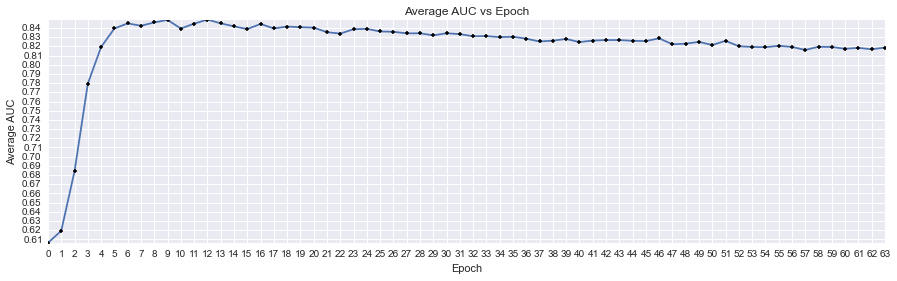

In [36]:
epoch_sum(alleles,mypath,nb_lines)